##### Muhammad Aryasatya N | 22083010085 | RTM-3 | Machine Learning (C) 

### Eksponential Smoothing untuk Data COVID-19 Tahun 2020-2022: Analisis dan Visualisasi Tracking Signal

Load Dataset

In [4]:
import pandas as pd
import numpy as np
data = pd.read_excel("data harian covid-19 2020-2022.xlsx")
data

,No,Periode,Aktual
0,1,2020-02-03 00:00:00,2
1,2,2020-03-03 00:00:00,0
2,3,2020-04-03 00:00:00,0
3,4,2020-05-03 00:00:00,0
4,5,2020-06-03 00:00:00,2
...,...,...,...
924,925,2022-12-09 00:00:00,1848
925,926,9/13/2022,2896
926,927,9/14/2022,2799
927,928,9/15/2022,2651


Membuat Fungsi

In [19]:
def exspsmooth(data,alpha):
    import pandas as pd
    # menghitung forecast
    forecasts = []
    forecast_1 = data['Aktual'].sum() / len(data)
    forecasts.append(forecast_1)
    for i in range(1, len(data)):
        forecast_i = forecasts[i-1] + alpha * (data['Aktual'][i-1] - forecasts[i-1])
        forecasts.append(forecast_i)
    data['Forecast'] = forecasts

    # Menghitung error, RSFE, absolute error, cumulative absolute error
    data['Error'] = data['Aktual'] - data['Forecast']
    data['RSFE'] = data['Error']
    cumulative_rsfe = data['RSFE'].cumsum()
    for i in range(1, len(data)):
        data.at[i, 'RSFE'] = data.at[i, 'Error'] + data.at[i-1, 'RSFE']
    data['Absolute Error'] = abs(data['Error'])
    data['Kumulatif Absolut Error'] = data['Absolute Error'].cumsum()

    # Menghitung MAD
    data['MAD'] = data['Kumulatif Absolut Error'] / data['No']

    # Menghitung tracking signal dan MAPE
    MAD = data['MAD'].mean()
    data['Tracking Signal'] = data['RSFE'] / data['MAD']
    data['MAPE'] = (data['Absolute Error'] / data['Aktual']) * 100
    
    return data

Pemnaggilan Fungsi

In [20]:
data = pd.read_excel('data harian covid-19 2020-2022.xlsx')  
alpha = 0.8
exspsmooth(data,alpha)

,No,Periode,Aktual,Forecast,Error,RSFE,Absolute Error,Kumulatif Absolut Error,MAD,Tracking Signal,MAPE
0,1,2020-02-03 00:00:00,2,6894.557589,-6892.557589,-6892.557589,6892.557589,6892.557589,6892.557589,-1.000000,3.446279e+05
1,2,2020-03-03 00:00:00,0,1380.511518,-1380.511518,-8273.069107,1380.511518,8273.069107,4136.534553,-2.000000,inf
2,3,2020-04-03 00:00:00,0,276.102304,-276.102304,-8549.171410,276.102304,8549.171410,2849.723803,-3.000000,inf
3,4,2020-05-03 00:00:00,0,55.220461,-55.220461,-8604.391871,55.220461,8604.391871,2151.097968,-4.000000,inf
4,5,2020-06-03 00:00:00,2,11.044092,-9.044092,-8613.435963,9.044092,8613.435963,1722.687193,-5.000000,4.522046e+02
...,...,...,...,...,...,...,...,...,...,...,...
924,925,2022-12-09 00:00:00,1848,2084.027930,-236.027930,-6249.190003,236.027930,993144.011865,1073.669202,-5.820405,1.277207e+01
925,926,9/13/2022,2896,1895.205586,1000.794414,-5248.395589,1000.794414,994144.806279,1073.590504,-4.888638,3.455782e+01
926,927,9/14/2022,2799,2695.841117,103.158883,-5145.236707,103.158883,994247.965162,1072.543652,-4.797228,3.685562e+00
927,928,9/15/2022,2651,2778.368223,-127.368223,-5272.604930,127.368223,994375.333386,1071.525144,-4.920654,4.804535e+00


In [15]:
filter_average = exspsmooth(data,alpha).iloc[1:].replace([np.inf, -np.inf], np.nan).dropna(subset=["MAPE"])
average_mape = filter_average['MAPE'].mean()

print("Rata-rata MAPE:", average_mape)

Rata-rata MAPE: 18.142301491663176


Visualisasi Hasil Exponential Smoothing

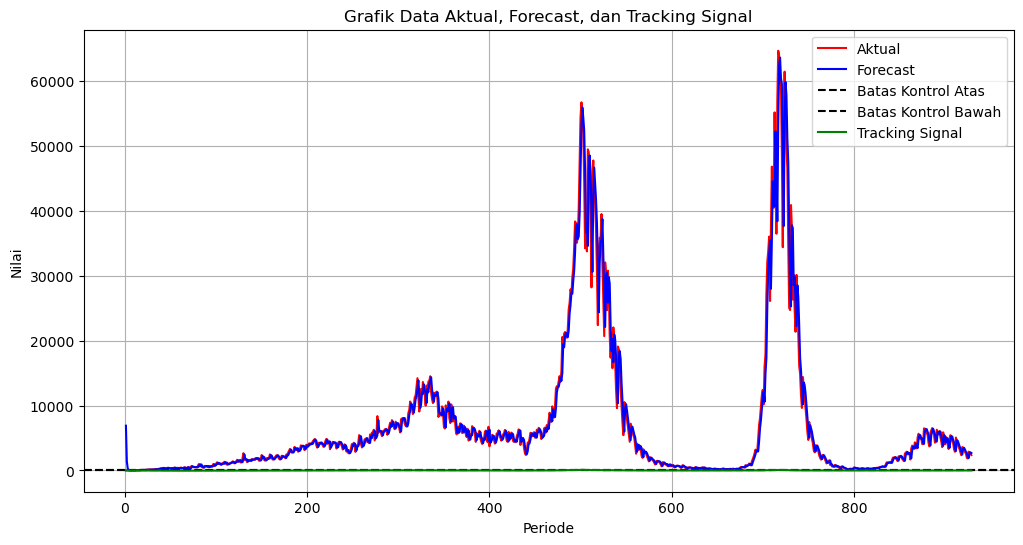

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

data = exspsmooth(data, alpha)  

# Visualisasi data aktual dan hasil prediksi
plt.figure(figsize=(12, 6))  # Atur ukuran grafik jika perlu
plt.plot(data['No'], data['Aktual'], label='Aktual', color='red')
plt.plot(data['No'], data['Forecast'], label='Forecast', color='blue')

# Tambahkan grafik tracking signal
plt.axhline(y=1, color='black', linestyle='--', label='Batas Kontrol Atas')
plt.axhline(y=-1, color='black', linestyle='--', label='Batas Kontrol Bawah')
plt.plot(data['No'], data['Tracking Signal'], label='Tracking Signal', color='green')

# Atur label, judul, dan legenda grafik
plt.xlabel('Periode')
plt.ylabel('Nilai')
plt.title('Grafik Data Aktual, Forecast, dan Tracking Signal')
plt.legend()

# Tampilkan grafik
plt.grid(True)
plt.show()